In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import statsmodels.api as sm

In [35]:
df = pd.read_csv(r"D:\lap trinh\data for analyst\fifa_cleaned.csv")

In [36]:
df.head()

,id,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,...,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes,tags,traits
0,1,L. Messi,Lionel Andrés Messi Cuccittini,24/06/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,...,33,28,26,6,11,15,14,8,"#Dribbler,#Distance Shooter,#Crosser,#FK Speci...","Finesse Shot,Long Shot Taker (CPU AI Only),Spe..."
1,2,C. Eriksen,Christian Dannemann Eriksen,14/02/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,...,59,57,22,9,14,7,7,6,"#Playmaker ,#Crosser,#FK Specialist,#Complete...","Flair,Long Shot Taker (CPU AI Only),Playmaker ..."
2,3,P. Pogba,Paul Pogba,15/03/1993,25,190.50,83.9,"CM,CAM",France,88,...,63,67,67,5,6,2,4,3,"#Dribbler,#Playmaker ,#Strength,#Complete Mid...","Flair,Long Passer (CPU AI Only),Long Shot Take..."
3,4,L. Insigne,Lorenzo Insigne,04/06/1991,27,162.56,59.0,"LW,ST",Italy,88,...,51,24,22,8,4,14,9,10,"#Speedster,#Dribbler,#Crosser,#Acrobat","Finesse Shot,Long Shot Taker (CPU AI Only),Spe..."
4,5,K. Koulibaly,Kalidou Koulibaly,20/06/1991,27,187.96,88.9,CB,Senegal,88,...,91,88,87,7,11,7,13,5,"#Tackling ,#Tactician ,#Strength,#Complete Def...",Power Header


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 66 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             17954 non-null  int64  
 1   name                           17954 non-null  object 
 2   full_name                      17954 non-null  object 
 3   birth_date                     17954 non-null  object 
 4   age                            17954 non-null  int64  
 5   height_cm                      17954 non-null  float64
 6   weight_kgs                     17954 non-null  float64
 7   positions                      17954 non-null  object 
 8   nationality                    17954 non-null  object 
 9   overall_rating                 17954 non-null  int64  
 10  potential                      17954 non-null  int64  
 11  value_euro                     17699 non-null  float64
 12  wage_euro                      17708 non-null 

In [38]:
# Thay thế những gtr Na ở các cột có kiểu dữ liệu là số thành giá trị trung bình của cột đó 
for x in df.columns :
    if(df[x].dtype != ('O')):
        df[x].fillna(np.mean(df[x]))


In [40]:
df.describe()

,id,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),...,penalties,composure,marking,standing_tackle,sliding_tackle,GK_diving,GK_handling,GK_kicking,GK_positioning,GK_reflexes
count,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,1.769900e+04,17708.000000,17954.000000,17954.000000,...,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000,17954.000000
mean,8977.500000,25.565445,174.946921,75.301047,66.240169,71.430935,2.479280e+06,9902.134628,1.111674,2.945695,...,48.357302,58.680183,47.162861,47.733040,45.705915,16.784449,16.556199,16.388660,16.541049,16.874067
std,5183.017702,4.705708,14.029449,7.083684,6.963730,6.131339,5.687014e+06,21995.593750,0.392168,0.663691,...,15.810844,11.625541,20.037346,21.674973,21.285812,17.893895,17.108234,16.701447,17.231495,18.182943
min,1.000000,17.000000,152.400000,49.900000,47.000000,48.000000,1.000000e+04,1000.000000,1.000000,1.000000,...,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,4489.250000,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,...,38.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,8977.500000,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,...,49.000000,60.000000,52.500000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,13465.750000,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,17954.000000,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,...,92.000000,96.000000,94.000000,93.000000,90.000000,90.000000,92.000000,92.000000,90.000000,94.000000


# Analysis goals by age ( 20 -> 30)

In [9]:
df_goalage = df.groupby('age').sum()['finishing'].reset_index()
df_goalage = df_goalage.set_index('age')

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12064\1906264658.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_goalage = df.groupby('age').sum()['finishing'].reset_index()


Text(0.5, 1.0, 'Age and goal')

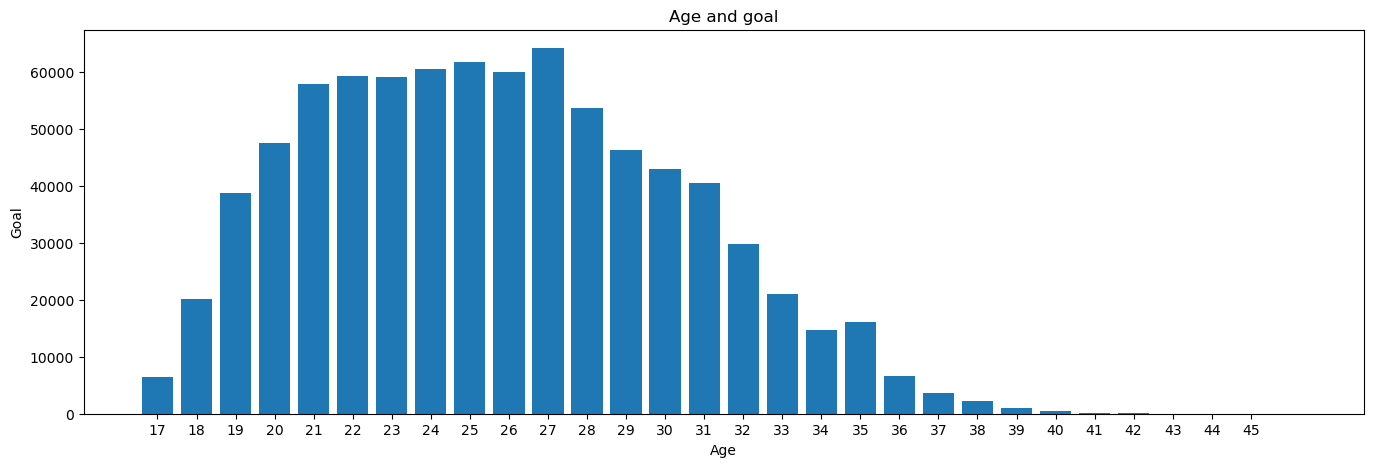

In [10]:
fig = plt.figure()
axes1 = fig.add_axes([0.7, -1, 2, 0.8]) 
# đối tượng Figure chính Axes 1
axes1.bar(df_goalage.index, df_goalage['finishing'])
axes1.set_xticks(range(df_goalage.index[0],df_goalage.index[len(df_goalage.index)-1]))# cách hiển thị đầy đủ số ở trục x ở đây là tuổi 17 --> 46 
axes1.set_xlabel('Age')
axes1.set_ylabel('Goal')
axes1.set_title('Age and goal')


# Analysis Value of footballer by ages

In [6]:
df_valuesage = df.groupby('age').sum()['value_euro']

Text(0.5, 1.0, 'Value by Age')

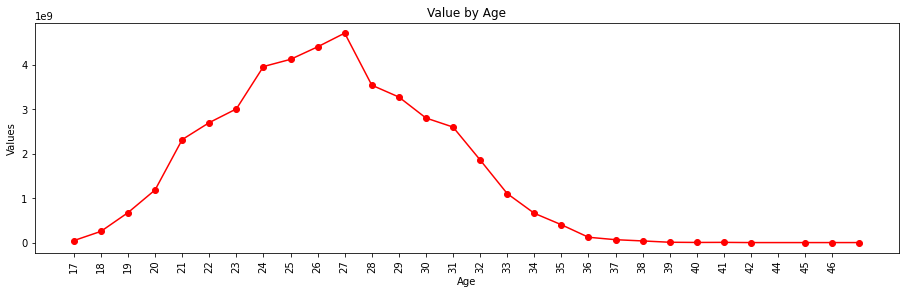

In [7]:
fig = plt.figure()# Khai báo một đối tượng cho biểu đồ
axes = fig.add_axes([0.1, 0.1, 2, 0.8])# left, bottom, width, height (khoảng từ 0 đến 1)
axes.plot(df_valuesage .index, df_valuesage , "ro-")
axes.set_xticks(range(df_valuesage.index[0],df_valuesage.index[len(df_valuesage.index)-1]), df_valuesage.index,rotation ="90")
axes.set_xlabel('Age')
axes.set_ylabel('Values')
axes.set_title('Value by Age')

# Number of goals by left and right leg

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12064\2479459141.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_foot = df.groupby('preferred_foot').sum()['finishing']


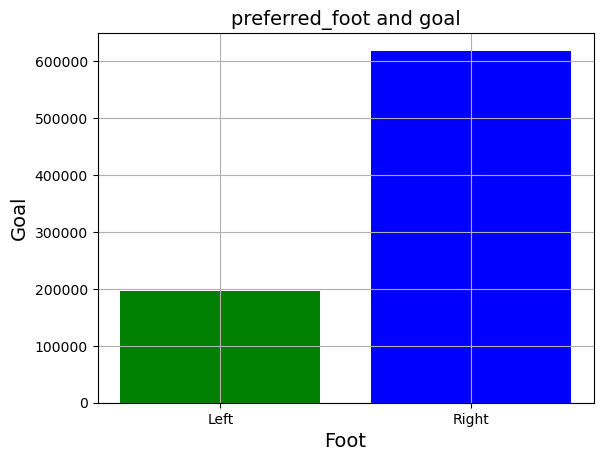

In [41]:
df_foot = df.groupby('preferred_foot').sum()['finishing']
plt.bar(['Left','Right'],df_foot,color = ['green','blue'])
plt.title('preferred_foot and goal', fontsize=14)
plt.xlabel('Foot', fontsize=14)
plt.ylabel('Goal', fontsize=14)
plt.grid(True)
plt.show()

# Compare value between LB players and RB players

In [9]:
# Get LB and RB players
def check (x):
        if 'LB' in x or 'RB' in x:
            return True
        else:
            return False
        
df_LBandRB = df[df["positions"].apply(check) == True]

#Change the 'position' to onlyone LB or RB value 
def abc (x):
        if 'LB' in x:
            return True 
df_LBandRB['positions'] = np.where(df_LBandRB['positions'].apply(abc),'LB','RB')
df_LBRB_VL = df_LBandRB.groupby('positions').sum()['value_euro']

C:\Users\Administrator\AppData\Local\Temp\ipykernel_10504\1738977060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_LBandRB['positions'] = np.where(df_LBandRB['positions'].apply(abc),'LB','RB')


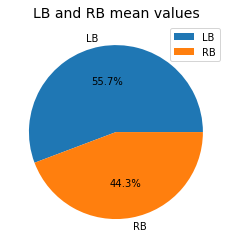

In [10]:
plt.pie(df_LBRB_VL,autopct = '%1.1f%%',labels=['LB','RB'])
plt.title('LB and RB mean values', fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

# The ratio between "ball_control" ,"short_passing", "long_passing" first 10 player 

In [11]:
df_cp = df[["name","ball_control","short_passing",'long_passing']].head(10)
df_cp

,name,ball_control,short_passing,long_passing
0,L. Messi,96,92,89
1,C. Eriksen,91,91,89
2,P. Pogba,90,86,90
3,L. Insigne,93,85,78
4,K. Koulibaly,63,68,60
5,V. van Dijk,76,79,81
6,K. Mbappé,91,82,73
7,S. Agüero,89,81,64
8,M. Neuer,46,55,59
9,E. Cavani,82,78,52


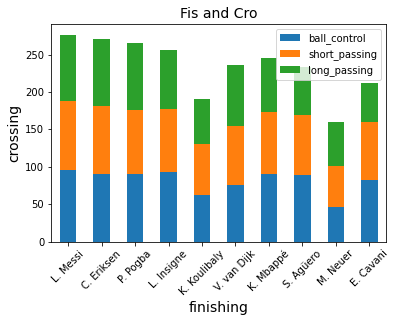

In [12]:
# Cách vẽ biểu đồ cột khi có 2 dữ liệu cột 
df_cp.set_index("name").plot(kind= "bar",stacked = True)
plt.xticks(rotation = '45')
plt.title('Fis and Cro', fontsize=14)
plt.xlabel('finishing', fontsize=14)
plt.ylabel('crossing', fontsize=14)
plt.show()

# Show linear regression chart of first hundred observes between crossing and finishing

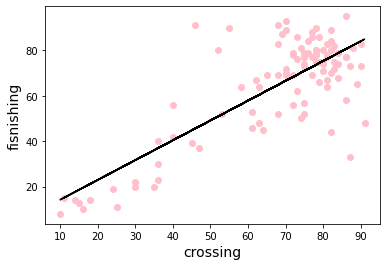

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              finishing   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.618
Method:                 Least Squares   F-statistic:                     162.8
Date:                Mon, 05 Dec 2022   Prob (F-statistic):           1.26e-22
Time:                        10:22:18   Log-Likelihood:                -409.37
No. Observations:                 101   AIC:                             822.7
Df Residuals:                      99   BIC:                             828.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5154      4.793      1.151      0.253      -3.995      15.026
crossing       0.8724      0.068     12.759      0.000       0.737       1.008
==============================================================================
Omnibus:                        7.454   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.024   Jarque-Bera (JB):               14.329
Skew:                          -0.027   Prob(JB):                     0.000774
Kurtosis:                       4.844   Cond. No.                         240.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
df1 = df.loc[0:100,["crossing","finishing"]]
x = df1["crossing"]
y = df1["finishing"]
b2, b1 = np.polyfit(x, y, 1)# create B1 and B2 
plt.scatter(x,y,c = 'pink', marker="o")
plt.plot(x,b1 + b2*x,"black")# draw linear regression line 
plt.xlabel('crossing', fontsize=14)
plt.ylabel('fisnishing', fontsize=14)
plt.show()
b0 = sm.add_constant(x)
resutl = sm.OLS(y,b0).fit()
resutl.summary()

# FIND TOP 5 BEST PLAYER IN 4 POSITION (ST (TIEN DAO), CDM (TIEN VE), CB (HAU VE), GK (THU MON))

In [14]:
def st (a):
    if "ST" in a.split(","):
        return True
def cdm (a):
    if "CDM" in a.split(","):
        return True
def cb (a):
    if "CB" in a.split(","):
        return True
def gk (a):
    if "GK" in a.split(","):
        return True
    
a = ["finishing",'positioning'] # A good ST is a person who have this elements 
df_st = df.loc[df["positions"].apply(st) == True,["full_name"]+a].sort_values(by = a , ascending = False)[0:5]

b = ["vision","short_passing","long_passing"] # A good CDM is a person who have this elements 
df_cdm = df.loc[df["positions"].apply(cdm) == True,["full_name"]+b].sort_values(by = b , ascending = False)[0:5]

c= ["standing_tackle","sliding_tackle"]# A good CB is a person who have this elements 
df_cb = df.loc[df["positions"].apply(cb) == True,["full_name"]+c].sort_values(by = c , ascending = False)[0:5]

d= ["GK_handling", "GK_reflexes"] # A good GK is a person who have this elements 
df_gk = df.loc[df["positions"].apply(gk) == True,["full_name"]+d].sort_values(by = d , ascending = False)[0:5]

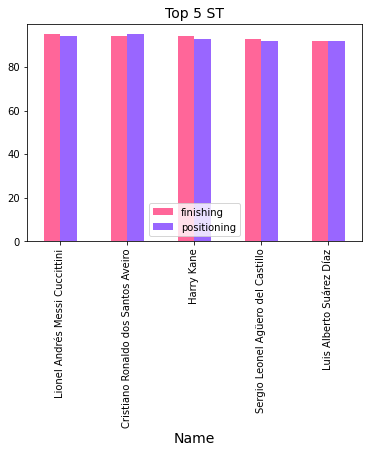

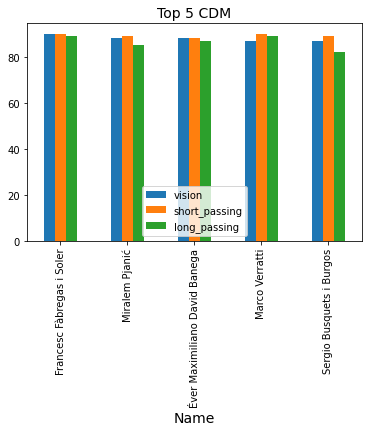

In [15]:
df_st.set_index("full_name").plot(kind= "bar", color =["#FF6699","#9966FF"], stacked = False)
plt.xticks(rotation = '90')
plt.title( "Top 5 ST", fontsize=14)
plt.xlabel('Name', fontsize=14)
plt.show()

df_cdm.set_index("full_name").plot(kind= "barh", stacked = False)
plt.xticks(rotation = '90')
plt.title( "Top 5 CDM", fontsize=14)
plt.xlabel('Name', fontsize=14)
plt.show()


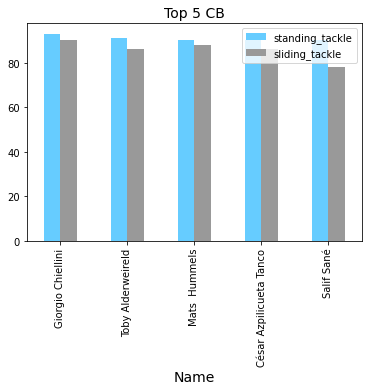

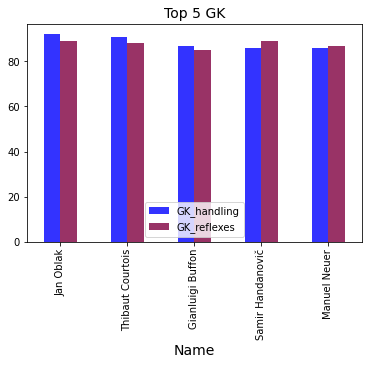

In [16]:
df_cb.set_index("full_name").plot(kind= "bar", color=["#66CCFF","#999999"], stacked = False)
plt.xticks(rotation = '90')
plt.title( "Top 5 CB", fontsize=14)
plt.xlabel('Name', fontsize=14)
plt.show()

df_gk.set_index("full_name").plot(kind= "bar",color=["#3333FF","#993366"], stacked = False)
plt.xticks(rotation = '90')
plt.title( "Top 5 GK", fontsize=14)
plt.xlabel('Name', fontsize=14)
plt.show()